In [1]:
from itertools import combinations, combinations_with_replacement, permutations

import matplotlib.pyplot as plt
import numpy as np

## A)

In [2]:
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])


In [3]:
obs = np.array([1, 0, 0, 0, 1, 0, 1, 0])
p_priori = np.array([0.2, 0.8])
states = np.array([0, 1])

total_states = combinations_with_replacement(states, len(obs))
total_states = np.array(list(total_states))


def hidden_states(states, N):
    states_permutation = []
    for i in states:
        p = permutations(i, N)
        p = list(p)
        for j in p:
            if j not in states_permutation:
                states_permutation.append(j)
    return np.array(states_permutation)


h_states = hidden_states(total_states, len(obs))
print(len(h_states))

256


In [4]:
def prob_states(p_priori, h_states, T, E, obs, N):
    prob = p_priori[h_states[0]]

    for i in range(N - 1):
        prob *= T[h_states[i + 1], h_states[i]]
    for i in range(N):
        prob *= E[obs[i], h_states[i]]

    return prob


prob = []
for i in h_states:
    prob.append(prob_states(p_priori, i, T, E, obs, len(obs)))

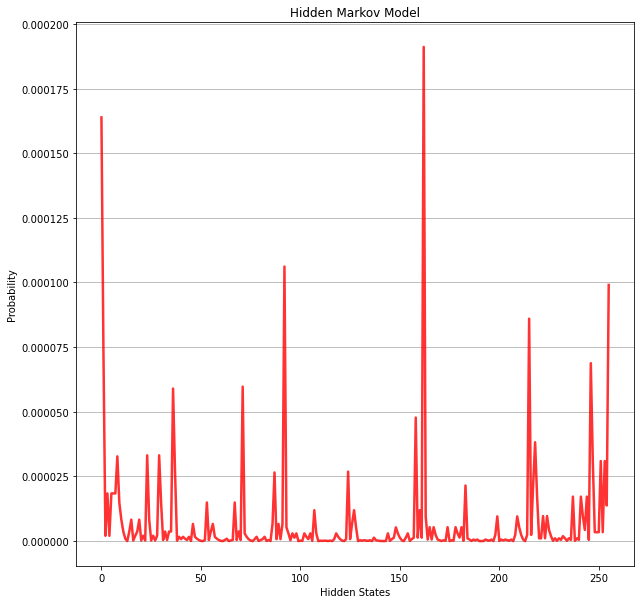

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title("Hidden Markov Model")
ax.set_xlabel("Hidden States")
ax.set_ylabel("Probability")
ax.yaxis.grid(True)
ax.plot(prob, color="red", linewidth=2.5, alpha=0.8)
plt.show()

## B)

In [6]:
P_vector = np.zeros(len(h_states))

for i in range(len(h_states)):
    P_vector[i] = prob_states(p_priori, h_states[i], T, E, obs, len(obs))

max_p_index = np.max(P_vector)
max_p = np.where(P_vector == max_p_index)

print("The most probable hidden state is: ", h_states[max_p])
print("The probability of the most probable hidden state is: ",
      f'{max_p_index:.7f}')


The most probable hidden state is:  [[1 1 1 1 0 0 0 0]]
The probability of the most probable hidden state is:  0.0001911


## C)

In [7]:
PObs = np.sum(np.sum(P_vector))
print(np.sum(PObs))

0.0019344381513984013


In [8]:
obs_states = h_states
dim = len(obs_states)
P_Obs = np.zeros(dim)

for j in range(dim):
    P = np.zeros(dim)

    for i in range(dim):
        P[i] = prob_states(p_priori, h_states[i], T, E, obs_states[j],
                           len(obs))
    P_Obs[j] = np.sum(P)


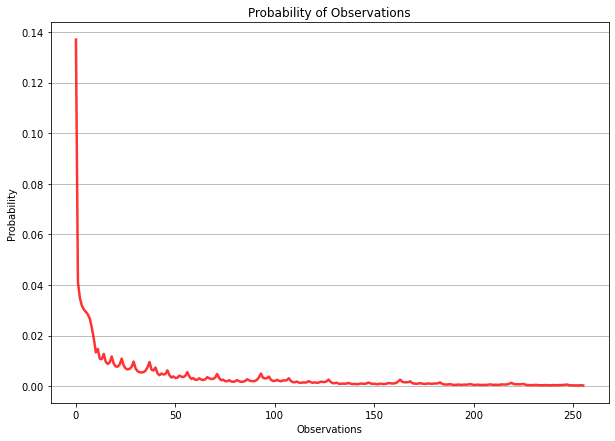

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.set_title("Probability of Observations")
ax.set_xlabel("Observations")
ax.set_ylabel("Probability")
ax.yaxis.grid(True)
ax.plot(P_Obs, color="red", linewidth=2.5, alpha=0.8)
plt.show()

## D)

In [10]:
print("The total probability of the observations is: ", np.sum(P_Obs))

The total probability of the observations is:  1.0000000000000007


## E)

Como vemos, la probabilidad a priori se encuentra en todas las funciones usadas, por ende, seria de esperar que al cambiar estos valores tambien cambiara la probabilidad a posteriori.

Para probarlo vamos a cambiar los valores de la probabilidad a priori y veremos que pasa.

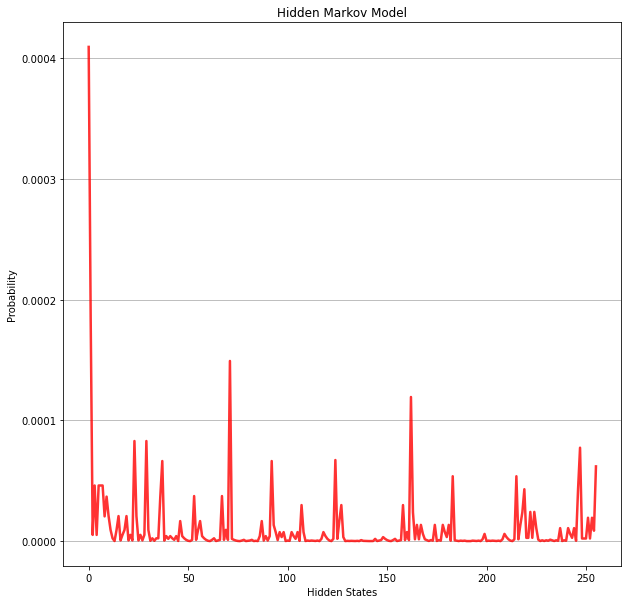

In [11]:
p_priori = np.array([0.5, 0.5])
prob = []
for i in h_states:
    prob.append(prob_states(p_priori, i, T, E, obs, len(obs)))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title("Hidden Markov Model")
ax.set_xlabel("Hidden States")
ax.set_ylabel("Probability")
ax.yaxis.grid(True)
ax.plot(prob, color="red", linewidth=2.5, alpha=0.8)
plt.show()

Como vemos, es claramente diferente.